Here, we will try to create, compile and train our classsification model in tensorflow Keras

In [43]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip

> pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# keras.__version__

In [3]:
tf.__version__


'2.15.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


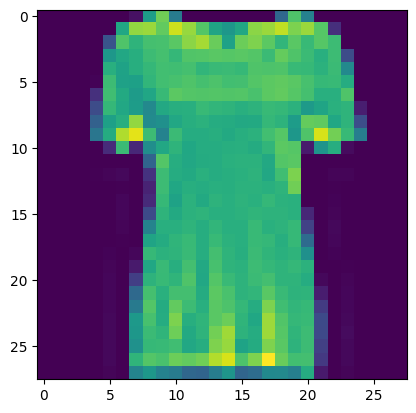

In [5]:
plt.imshow(X_train_full[10])

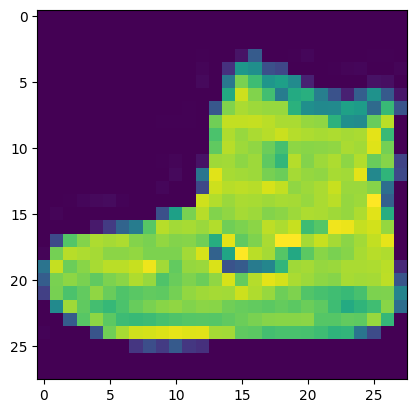

In [6]:
plt.imshow(X_train_full[0])

In [7]:
y_train_full[0]

9

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[10]]

'T-shirt/top'

In [10]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [11]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [15]:
model = keras.models.Sequential() # Creating sequential object

# adding different layers to our object
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Flatten: because we want to convert 2D array of 28 x 28 pixel into single array of 748
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


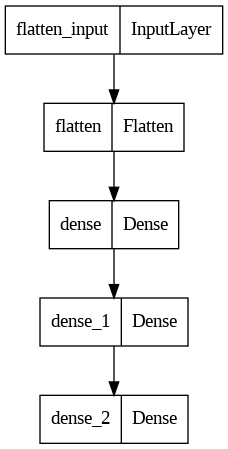

In [17]:
# viewing the structure of the neural network
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[ 0.07182467,  0.06862621,  0.06365952, ...,  0.04465441,
        -0.03037652,  0.04434206],
       [ 0.01643568,  0.01414166, -0.0029157 , ...,  0.06425701,
         0.05451937,  0.0266944 ],
       [-0.00573491,  0.05433351,  0.0303214 , ...,  0.02808558,
         0.00251184,  0.0614458 ],
       ...,
       [ 0.00634804,  0.0171643 ,  0.071173  , ..., -0.03395917,
        -0.03027236,  0.00830426],
       [-0.05979592,  0.0278372 , -0.0269444 , ...,  0.00464537,
         0.0486406 , -0.02954192],
       [-0.06212139,  0.01716797, -0.06883958, ...,  0.06063707,
         0.05741459,  0.0232842 ]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

Documentation - https://keras.io/models/sequential/

In [23]:
# setting up the learning processes using compile function
model.compile(loss="sparse_categorical_crossentropy", # because y are in form of labels for 10 differnet items
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7183 - accuracy: 0.7628 - val_loss: 0.5276 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4882 - accuracy: 0.8286 - val_loss: 0.4383 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4431 - accuracy: 0.8435 - val_loss: 0.5408 - val_accuracy: 0.8012
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4161 - accuracy: 0.8540 - val_loss: 0.3976 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3970 - accuracy: 0.8621 - val_loss: 0.3795 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3783 - accuracy: 0.8665 - val_loss: 0.3758 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3658 - accuracy: 0.8709 - val_loss: 0.3694 - val_accuracy:

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
# getting all the information on losses and accuracies in the form of dictionary
model_history.history

{'loss': [0.7182921767234802,
  0.48818230628967285,
  0.44305941462516785,
  0.41612961888313293,
  0.3970009684562683,
  0.3783191740512848,
  0.365790992975235,
  0.354199081659317,
  0.34303516149520874,
  0.33387428522109985,
  0.32540223002433777,
  0.31628212332725525,
  0.30894559621810913,
  0.3027879297733307,
  0.29561275243759155,
  0.2903089225292206,
  0.2849345803260803,
  0.2788001298904419,
  0.27384138107299805,
  0.2684864103794098,
  0.2634653151035309,
  0.2588401138782501,
  0.2546384632587433,
  0.2500109374523163,
  0.24596211314201355,
  0.2412281632423401,
  0.23782232403755188,
  0.23419135808944702,
  0.22945493459701538,
  0.22645051777362823],
 'accuracy': [0.7628181576728821,
  0.8285999894142151,
  0.8435090780258179,
  0.8539636135101318,
  0.8621090650558472,
  0.866527259349823,
  0.8708545565605164,
  0.8735454678535461,
  0.8789272904396057,
  0.881563663482666,
  0.8832545280456543,
  0.8859090805053711,
  0.8898545503616333,
  0.891945481300354,
 

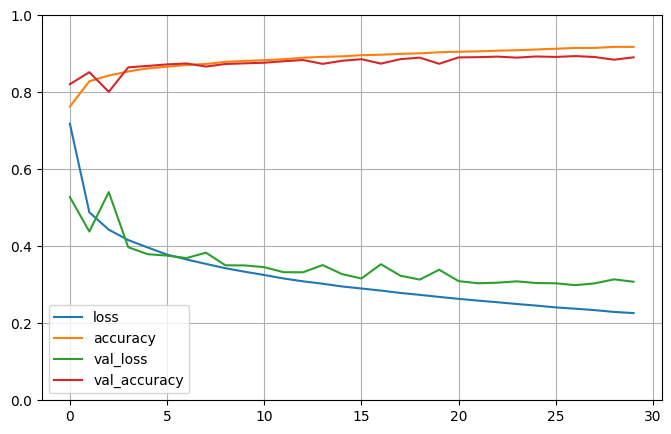

In [27]:
# visualizing how our accuracies  and losses are changing with each epochs
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In above chart, we can see that with each epochs our accuracies are increasing whereas the losses are decreasing.

We can also say that the model has not converged yet as the accuracy is still going up and losses are still going low. For this reason, we can run it for some more epochs.

# Evaluation

In [30]:
model.evaluate(X_test, y_test)
# the output here is the loss and accuracy because we used this matrics while compiling our model

313/313 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8832


[0.33678606152534485, 0.8831999897956848]

# Predicting the probability and the classes on new data

In [32]:
# since we do not have any new data we are taking first 3 samples from our test data sets
X_new = X_test[:3]

In [33]:
# predicting the probability score assigned to each class
y_proba = model.predict(X_new)
y_proba.round(2) # just to round up the probability value to 2 decimal digits

1/1 [==============================] - 0s 124ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.94],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Above, as our new data contains 3 records, we are getting output for those 3 records.

We can also see the 10 values  representing the probability value of teh coreesponding class

In [36]:
# directly predicting the class
y_pred = np.argmax(model.predict(X_new),axis=1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1])

In [38]:
# calling the label description using the earlier created class_names
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(size=(28, 28))


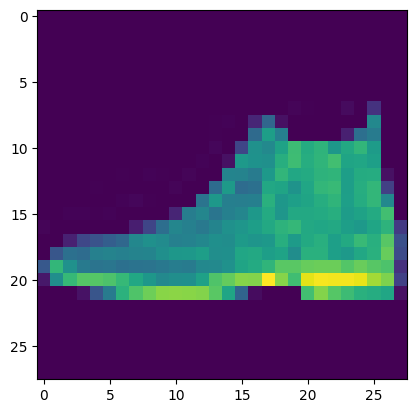

In [40]:
# plotting the image for confirmation
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


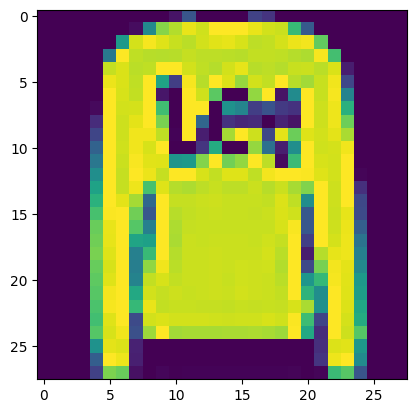

In [41]:
print(plt.imshow(X_test[1]))

AxesImage(size=(28, 28))


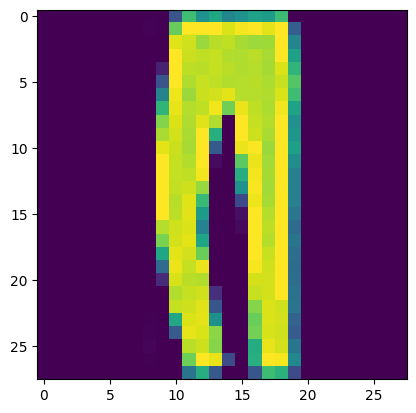

In [42]:
print(plt.imshow(X_test[2]))